# EDA(Exploratory Data Analysis)

In [19]:
import pandas as pd
import numpy as np
import plotnine 
from plotnine import *
import os, sys, gc
from tqdm.notebook import tqdm

- books.csv : 책의 메타정보
- book_tags.csv : 책-테그의 매핑정보
- ratings.csv : 사용자가 책에 대해 점수를 준 평점정보
- tags.csv : 테그의 정보
- to_read.csv : 사용자가 읽으려고 기록해둔 책 (장바구니)

In [20]:
path = './data/goodbooks-10k/'

In [21]:
books = pd.read_csv(path + "books.csv")
book_tags = pd.read_csv(path + "book_tags.csv")
ratings = pd.read_csv(path + "ratings.csv")
tags = pd.read_csv(path + "tags.csv")
to_read = pd.read_csv(path + "to_read.csv")

## books의 메타정보 확인

In [22]:
books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [23]:
books.columns

Index(['id', 'book_id', 'best_book_id', 'work_id', 'books_count', 'isbn',
       'isbn13', 'authors', 'original_publication_year', 'original_title',
       'title', 'language_code', 'average_rating', 'ratings_count',
       'work_ratings_count', 'work_text_reviews_count', 'ratings_1',
       'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 'image_url',
       'small_image_url'],
      dtype='object')

In [24]:
books['small_image_url'][0]

'https://images.gr-assets.com/books/1447303603s/2767052.jpg'

- 책같은 경우에는 표지의 영향을 많이 받아서, 해당 이미지의 표지에서 특징을 추출해서 CNN 같은 모델로 유사한 책을 찾는 Contents Based Recommendation도 가능

In [25]:
# 필요한 변수들만 사용 
books = books[['book_id', 'authors', 'title', 'ratings_count', 'average_rating', 'language_code']].reset_index(drop=True)

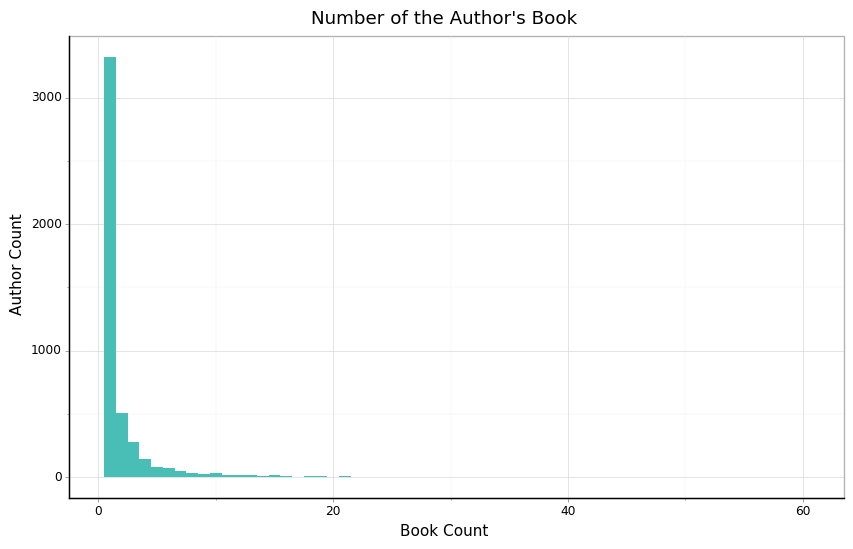

<ggplot: (162381091006)>

In [26]:
agg = books.groupby('authors')['authors'].agg({'count'})
# plotnine
## R : ggplot -> python : Plotnine
(ggplot(data = agg)
  + geom_histogram(aes(x='count'), binwidth = 1, fill = '#49beb7')
  + labs(title = "Number of the Author's Book",
         x = 'Book Count',
         y = 'Author Count')
  + theme_light() 
    + theme(
         axis_text_x = element_text(color='black'),
         axis_text_y = element_text(color='black'),
         axis_line=element_line(color="black"),
         axis_ticks=element_line(color = "grey"),
         figure_size=(10,6))    
)

In [27]:
print("책의 숫자:", books['book_id'].nunique())
print("저자의 숫자:", books['authors'].nunique(), "\n")
print(pd.DataFrame(agg['count'].describe()).T)

책의 숫자: 10000
저자의 숫자: 4664 

        count      mean       std  min  25%  50%  75%   max
count  4664.0  2.144082  3.414442  1.0  1.0  1.0  2.0  60.0


In [28]:
agg.sort_values(by='count', ascending=False)

,count
authors,
Stephen King,60
Nora Roberts,59
Dean Koontz,47
Terry Pratchett,42
Agatha Christie,39
...,...
Claire North,1
"Jostein Gaarder, James Anderson",1
"Jostein Gaarder, Paulette Møller",1


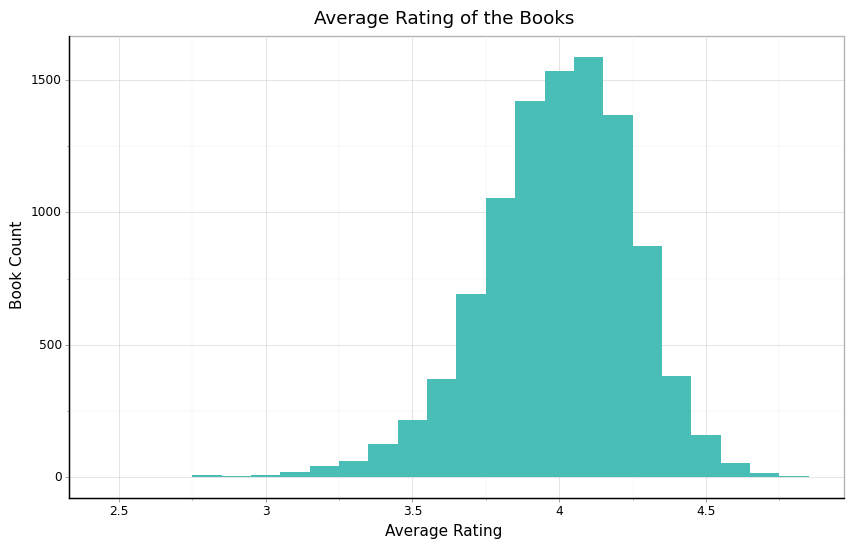

<ggplot: (162381071201)>

In [29]:
(ggplot(data = books)
  + geom_histogram(aes(x='average_rating'), binwidth = 0.1, fill = '#49beb7')
  + labs(title = "Average Rating of the Books",
         x = 'Average Rating',
         y = 'Book Count')
  + theme_light() 
    + theme(
         axis_text_x = element_text(color='black'),
         axis_text_y = element_text(color='black'),
         axis_line=element_line(color="black"),
         axis_ticks=element_line(color = "grey"),
         figure_size=(10,6))    
)

In [30]:
# 굳이 추천을 해줄 이유가 있을까?
books[books['average_rating'] <= 3].shape[0]

14

In [31]:
books.sort_values(by='average_rating', ascending=False).head()

,book_id,authors,title,ratings_count,average_rating,language_code
3627,24812,Bill Watterson,The Complete Calvin and Hobbes,28900,4.82,eng
3274,8,"J.K. Rowling, Mary GrandPré","Harry Potter Boxed Set, Books 1-5 (Harry Potte...",33220,4.77,eng
861,17332218,Brandon Sanderson,"Words of Radiance (The Stormlight Archive, #2)",73572,4.77,eng
8853,95602,Francine Rivers,Mark of the Lion Trilogy,9081,4.76,en-US
7946,5031805,"Anonymous, Lane T. Dennis, Wayne A. Grudem",ESV Study Bible,8953,4.76,eng


- 3점이하의 평점이 낮은 책들은 유사도가 높더라도 추천을 안하는게 좋을 수 있음
- 평점이 높은 책들은 우선적으로 추천해주는게 좋음 하지만, 평점이 높더라도 사람들이 많이 보지않은 책일 수도 있음

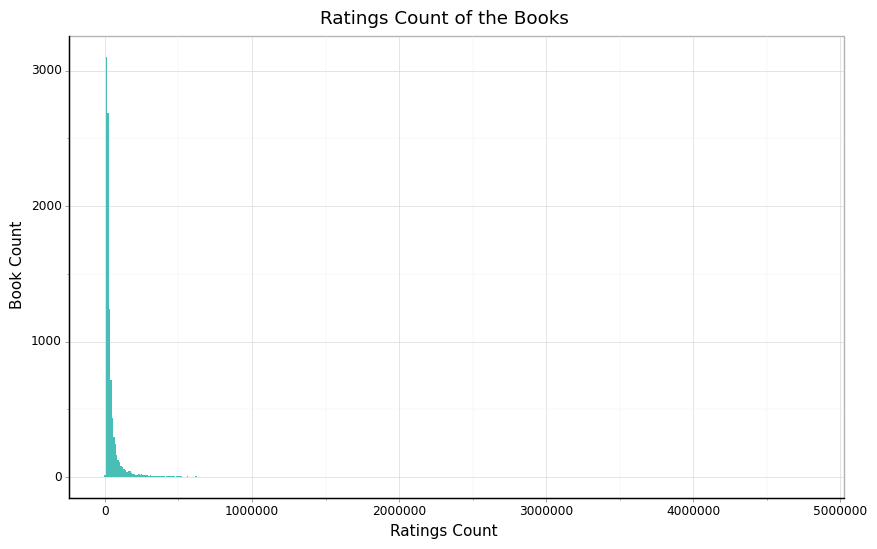

<ggplot: (162382449457)>

In [32]:
(ggplot(data = books)
  + geom_histogram(aes(x='ratings_count'), binwidth = 10000, fill = '#49beb7')
  + labs(title = "Ratings Count of the Books",
         x = 'Ratings Count',
         y = 'Book Count')
  + theme_light() 
    + theme(
         axis_text_x = element_text(color='black'),
         axis_text_y = element_text(color='black'),
         axis_line=element_line(color="black"),
         axis_ticks=element_line(color = "grey"),
         figure_size=(10,6))    
)

In [33]:
pd.DataFrame(books['ratings_count'].describe()).T

,count,mean,std,min,25%,50%,75%,max
ratings_count,10000.0,54001.2351,157369.956436,2716.0,13568.75,21155.5,41053.5,4780653.0


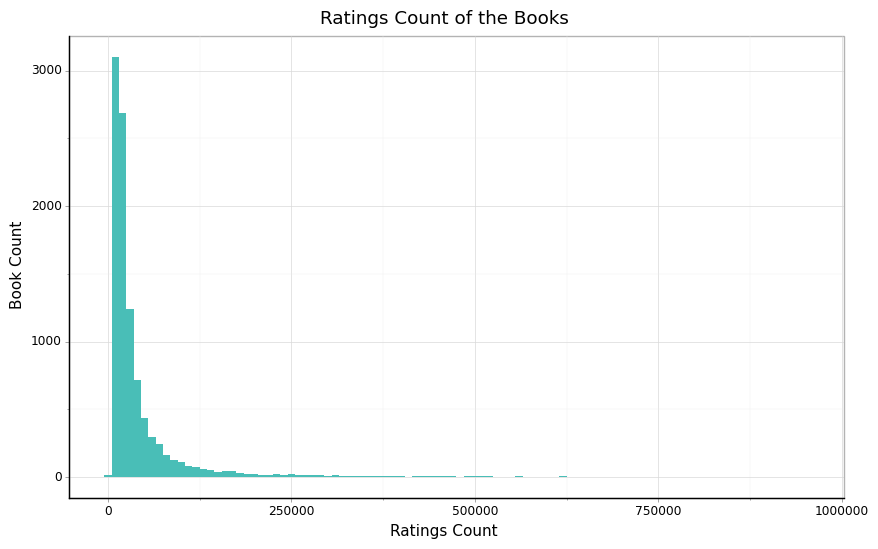

<ggplot: (162380043511)>

In [34]:
(ggplot(data = books[books['ratings_count'] < 1000000])
  + geom_histogram(aes(x='ratings_count'), binwidth = 10000, fill = '#49beb7')
  + labs(title = "Ratings Count of the Books",
         x = 'Ratings Count',
         y = 'Book Count')
  + theme_light() 
    + theme(
         axis_text_x = element_text(color='black'),
         axis_text_y = element_text(color='black'),
         axis_line=element_line(color="black"),
         axis_ticks=element_line(color = "grey"),
         figure_size=(10,6))    
)

In [35]:
books.sort_values(by='ratings_count', ascending=False).head()

,book_id,authors,title,ratings_count,average_rating,language_code
0,2767052,Suzanne Collins,"The Hunger Games (The Hunger Games, #1)",4780653,4.34,eng
1,3,"J.K. Rowling, Mary GrandPré",Harry Potter and the Sorcerer's Stone (Harry P...,4602479,4.44,eng
2,41865,Stephenie Meyer,"Twilight (Twilight, #1)",3866839,3.57,en-US
3,2657,Harper Lee,To Kill a Mockingbird,3198671,4.25,eng
4,4671,F. Scott Fitzgerald,The Great Gatsby,2683664,3.89,eng


- Twilight (Twilight, #1)은 ratings_count는 높지만, average_rating은 낮은 편

In [36]:
agg = pd.DataFrame(books['language_code'].value_counts()).reset_index()
agg.columns = ['language_code', 'count']
agg

,language_code,count
0,eng,6341
1,en-US,2070
2,en-GB,257
3,ara,64
4,en-CA,58
5,fre,25
6,ind,21
7,spa,20
8,ger,13
9,per,7


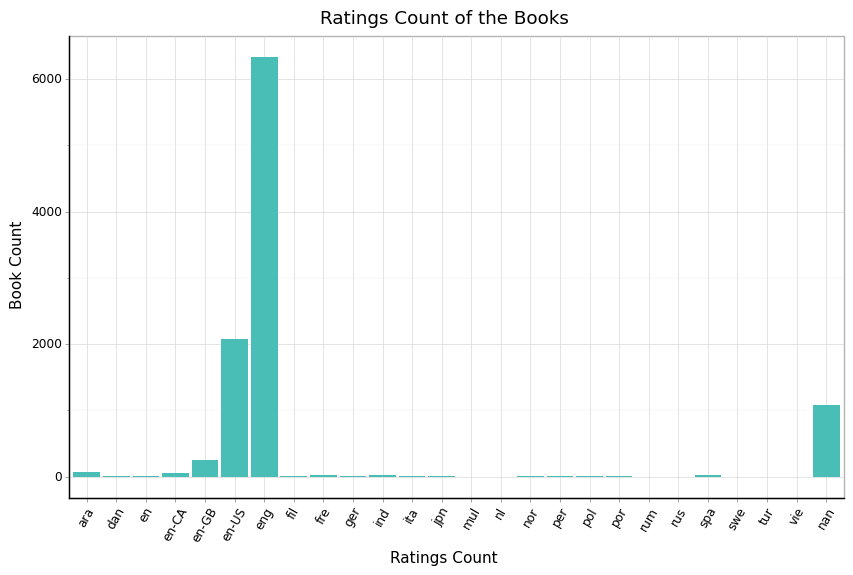

<ggplot: (162387143101)>

In [37]:
(ggplot(data = books)
  + geom_bar(aes(x='language_code'), fill = '#49beb7')
  + labs(title = "Ratings Count of the Books",
         x = 'Ratings Count',
         y = 'Book Count')
  + theme_light() 
    + theme(
         axis_text_x = element_text(color='black', rotation=60),
         axis_text_y = element_text(color='black'),
         axis_line=element_line(color="black"),
         axis_ticks=element_line(color = "grey"),
         figure_size=(10,6))    
)

In [38]:
books['language_code'].unique()

array(['eng', 'en-US', 'en-CA', nan, 'spa', 'en-GB', 'fre', 'nl', 'ara',
       'por', 'ger', 'nor', 'jpn', 'en', 'vie', 'ind', 'pol', 'tur',
       'dan', 'fil', 'ita', 'per', 'swe', 'rum', 'mul', 'rus'],
      dtype=object)

In [39]:
books.isnull().sum()

book_id              0
authors              0
title                0
ratings_count        0
average_rating       0
language_code     1084
dtype: int64

- 국적에 맞는 책을 추천해주는게 필요

In [40]:
# ratings에는 있지만, books에는 없는 책의 id의 수를 계산
len(set(ratings['book_id'].unique()).difference(set(books['book_id'].unique())))

9188

- 실제 평점을 부여했지만, 메타정보에 있는 책은 812건밖에 안됨
- Contents 기반의 추천시스템은 성능이 안좋을 것으로 예상

## book의 tag 정보 확인

- book_tags : book_id에 매핑된 tag_id의 정보
- tags : tag_id와 tag_name에 대한 매핑정보

In [41]:
book_tags.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [42]:
tags.head()

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


In [43]:
book_tags = pd.merge(tags, book_tags, how='left', on='tag_id')
book_tags

,tag_id,tag_name,goodreads_book_id,count
0,0,-,665,3
1,0,-,81176,5
2,0,-,147074,2
3,0,-,2983489,3
4,0,-,6713071,4
...,...,...,...,...
999907,34248,Ｆａｖｏｒｉｔｅｓ,8520610,374
999908,34248,Ｆａｖｏｒｉｔｅｓ,9361589,3765
999909,34249,Ｍａｎｇａ,248871,222
999910,34250,ＳＥＲＩＥＳ,28866,24


In [44]:
agg = book_tags.groupby(['tag_name'])['count'].agg({'sum'}).reset_index()
agg = agg.sort_values(by='sum', ascending=False).reset_index(drop=True)
agg.head()

,tag_name,sum
0,to-read,140718761
1,currently-reading,7507958
2,favorites,4503173
3,fiction,3688819
4,fantasy,3548157


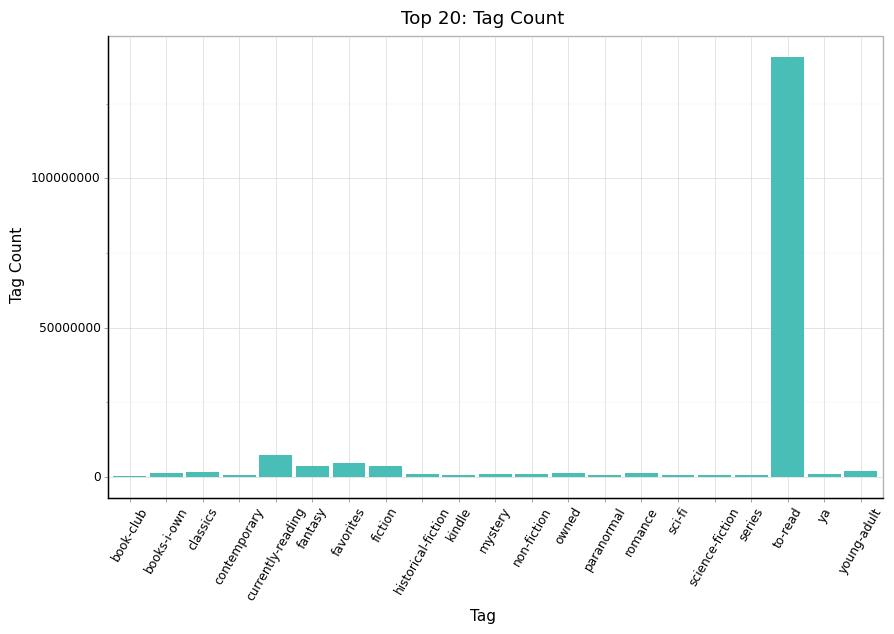

<ggplot: (162383980842)>

In [45]:
(ggplot(data = agg.loc[0:20])
  + geom_bar(aes(x='tag_name', y='sum'), fill = '#49beb7', stat = "identity")
  + labs(title = "Top 20: Tag Count",
         x = 'Tag',
         y = 'Tag Count')
  + theme_light() 
    + theme(
         axis_text_x = element_text(color='black', rotation=60),
         axis_text_y = element_text(color='black'),
         axis_line=element_line(color="black"),
         axis_ticks=element_line(color = "grey"),
         figure_size=(10,6))    
)


In [46]:
pd.DataFrame(agg['sum'].describe()).T

,count,mean,std,min,25%,50%,75%,max
sum,34252.0,6097.490716,762709.169868,-1.0,3.0,10.0,52.0,140718761.0


- 태그정보를 통해서 내가 보는 태그의 글을 추천해주는 것도 중요 (성향파악)
- tag가 유사한 책들로도 추천이 가능

## ratings 평점정보 확인

- 전체 책과 사용자에 대해 기술 통계

In [47]:
agg = ratings.groupby(['user_id'])['book_id'].agg({'count'}).reset_index()
agg

,user_id,count
0,1,3
1,2,3
2,3,2
3,4,3
4,5,5
...,...,...
53419,53420,6
53420,53421,8
53421,53422,18
53422,53423,2


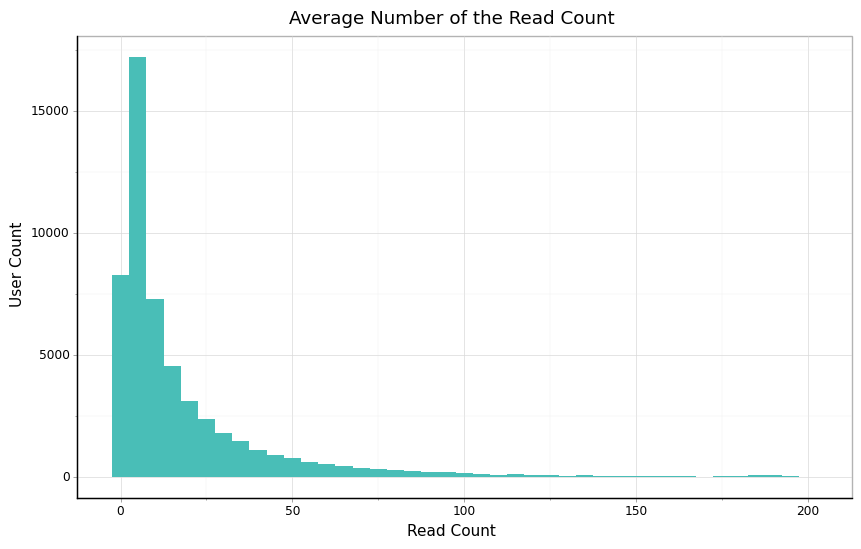

<ggplot: (162384005111)>

In [48]:
(ggplot(data = agg)
  + geom_histogram(aes(x='count'), binwidth = 5, fill = '#49beb7')
  + labs(title = 'Average Number of the Read Count',
         x = 'Read Count',
         y = 'User Count')
  + theme_light() 
    + theme(
         axis_text_x = element_text(color='black'),
         axis_text_y = element_text(color='black'),
         axis_line=element_line(color="black"),
         axis_ticks=element_line(color = "grey"),
         figure_size=(10,6))    
)

In [49]:
pd.DataFrame(agg['count'].describe()).T

,count,mean,std,min,25%,50%,75%,max
count,53424.0,18.376685,26.26869,2.0,3.0,8.0,22.0,200.0


- 평균 한 사람이 읽는 책의 수는 18권
- 최소 2권씩은 구매해서 읽음
- 최대 많이 읽은 사람은 200권의 책을 구매함

In [50]:
agg = ratings.groupby(['book_id'])['book_id'].agg({'count'}).reset_index()
agg

,book_id,count
0,1,100
1,2,100
2,3,100
3,4,100
4,5,100
...,...,...
9995,9996,98
9996,9997,89
9997,9998,95
9998,9999,99


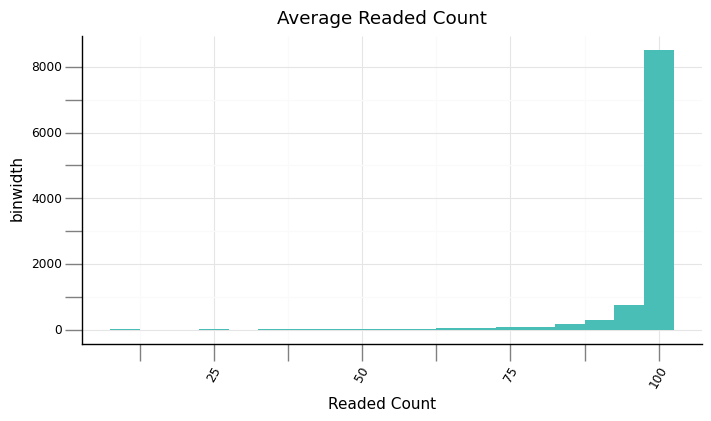

<ggplot: (162384055924)>

In [51]:
(ggplot(data=agg)
    + geom_histogram(aes(x='count', y='stat(count)'), fill = '#49beb7', binwidth=5)
    + theme_minimal()
    + ggtitle("Average Readed Count")
    + labs(x="Readed Count", y="binwidth") 
    + theme(
         axis_text_x = element_text(angle=60, color='black'),
         axis_text_y = element_text(color='black'),
         axis_line=element_line(color="black"),
         axis_ticks=element_line(color = "grey"),
         figure_size=(8,4))    
)

In [52]:
pd.DataFrame(agg['count'].describe()).T

,count,mean,std,min,25%,50%,75%,max
count,10000.0,98.1756,5.690167,8.0,99.0,100.0,100.0,100.0


- 책의 경우 최소 8명은 읽고, 많이 읽힌 책의 경우 100명은 읽었습니다.
- 편차는 크지만, 평점이 부여된 책들의 대부분이 100명씩은 읽은 책들만 뽑힌 것을 볼 수 있습니다.
- 이게 책들의 특징이라기보다는 10k만큼의 책을 선정하려고 임의로 샘플링해서 발생한 문제로 보입니다 (ㅜㅜ)

In [53]:
agg.head()

,book_id,count
0,1,100
1,2,100
2,3,100
3,4,100
4,5,100


In [54]:
books[books['book_id'].isin([1, 2, 3, 4, 5, 6, 7, 8])].head()

,book_id,authors,title,ratings_count,average_rating,language_code
1,3,"J.K. Rowling, Mary GrandPré",Harry Potter and the Sorcerer's Stone (Harry P...,4602479,4.44,eng
17,5,"J.K. Rowling, Mary GrandPré, Rufus Beck",Harry Potter and the Prisoner of Azkaban (Harr...,1832823,4.53,eng
20,2,"J.K. Rowling, Mary GrandPré",Harry Potter and the Order of the Phoenix (Har...,1735368,4.46,eng
23,6,"J.K. Rowling, Mary GrandPré",Harry Potter and the Goblet of Fire (Harry Pot...,1753043,4.53,eng
26,1,"J.K. Rowling, Mary GrandPré",Harry Potter and the Half-Blood Prince (Harry ...,1678823,4.54,eng


In [55]:
ratings['user_id'].unique()

array([  314,   439,   588, ..., 43623, 24406, 27590], dtype=int64)

In [56]:
ratings[(ratings['user_id'] == 314) & (ratings['book_id'].isin([1,2,3,4,5,6,7,8]))]

,book_id,user_id,rating
0,1,314,5
200,3,314,3
400,5,314,4
501,6,314,5


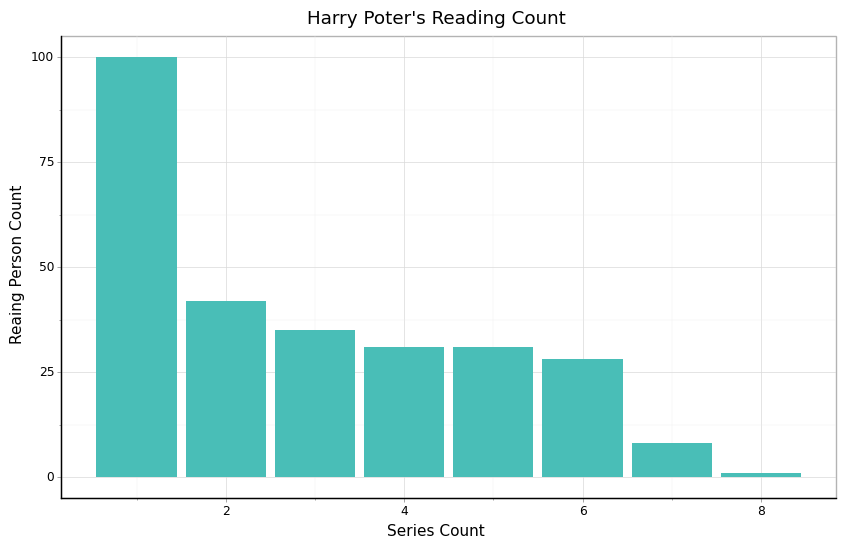

<ggplot: (162384055492)>

In [57]:
# ratings를 8개 전부 다 구매한 사람 (해리포터 시리즈 8개)
agg = ratings[ratings['book_id'].isin([1,2,3,4,5,6,7,8])].groupby(['user_id'])['book_id'].agg({'nunique'})
agg = agg.reset_index()
agg = agg.groupby(['nunique'])['user_id'].agg({'count'}).reset_index()

(ggplot(data = agg)
  + geom_bar(aes(x='nunique', y='count'), fill = '#49beb7', stat = "identity")
  + labs(title = "Harry Poter's Reading Count",
         x = 'Series Count',
         y = 'Reaing Person Count')
  + theme_light() 
    + theme(
         axis_text_x = element_text(color='black'),
         axis_text_y = element_text(color='black'),
         axis_line=element_line(color="black"),
         axis_ticks=element_line(color = "grey"),
         figure_size=(10,6))    
)

In [58]:
agg['ratio'] = agg['count'] / agg['count'].sum()
agg[['nunique', 'ratio']].T

,0,1,2,3,4,5,6,7
nunique,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000
ratio,0.362319,0.152174,0.126812,0.112319,0.112319,0.101449,0.028986,0.003623


- 해리포터와 같이 시리즈성의 글들은 같이 읽는 경향이 있음

## to read 정보

In [59]:
ratings.shape

(981756, 3)

In [60]:
ratings['user_id'].nunique()

53424

In [61]:
ratings['book_id'].nunique()

10000

In [62]:
to_read.head()

,user_id,book_id
0,1,112
1,1,235
2,1,533
3,1,1198
4,1,1874


In [63]:
to_read['user_id'].nunique()

48871

- 이미 읽은 정보뿐만 아니라 읽을 책들에 대한 정보도 결합해서 추천이 가능

# 학습셋과 검증셋 생성

In [64]:
agg = ratings.groupby(['user_id'])['book_id'].agg({'unique'}).reset_index()
agg.head()

,user_id,unique
0,1,"[1180, 4893, 6285]"
1,2,"[8034, 8855, 9762]"
2,3,"[9014, 9049]"
3,4,"[3273, 3469, 8464]"
4,5,"[4829, 6646, 6703, 7487, 8072]"


In [65]:
agg['train'] = agg['unique'].apply(lambda x: np.random.choice(x, len(x)//2))
agg.head()

,user_id,unique,train
0,1,"[1180, 4893, 6285]",[4893]
1,2,"[8034, 8855, 9762]",[9762]
2,3,"[9014, 9049]",[9049]
3,4,"[3273, 3469, 8464]",[8464]
4,5,"[4829, 6646, 6703, 7487, 8072]","[4829, 6646]"


In [66]:
test = []
for i in tqdm(range(0, agg.shape[0])):
    test_rec = list(set(agg.loc[i, 'unique']).difference(set(agg.loc[i, 'train'])))
    test.append(test_rec)
agg['test'] = test
agg.head()

  0%|          | 0/53424 [00:00<?, ?it/s]

,user_id,unique,train,test
0,1,"[1180, 4893, 6285]",[4893],"[1180, 6285]"
1,2,"[8034, 8855, 9762]",[9762],"[8034, 8855]"
2,3,"[9014, 9049]",[9049],[9014]
3,4,"[3273, 3469, 8464]",[8464],"[3273, 3469]"
4,5,"[4829, 6646, 6703, 7487, 8072]","[4829, 6646]","[8072, 7487, 6703]"


In [67]:
# train dataset 
train_map = agg[['user_id', 'train']]

# unnest tags
train_map_unnest = np.dstack(
    (
        np.repeat(train_map.user_id.values, list(map(len, train_map.train))), 
        np.concatenate(train_map.train.values)
    )
)

train_map_unnest = pd.DataFrame(data = train_map_unnest[0], columns = train_map.columns)
train_map_unnest.head()

,user_id,train
0,1,4893
1,2,9762
2,3,9049
3,4,8464
4,5,4829


In [68]:
# test dataset 
test_map = agg[['user_id', 'test']]

# unnest tags
test_map_unnest = np.dstack(
    (
        np.repeat(test_map.user_id.values, list(map(len, test_map.test))), 
        np.concatenate(test_map.test.values)
    )
)

test_map_unnest = pd.DataFrame(data = test_map_unnest[0], columns = test_map.columns)
test_map_unnest.head()

,user_id,test
0,1,1180
1,1,6285
2,2,8034
3,2,8855
4,3,9014


In [69]:
train_map_unnest.columns = ['user_id', 'book_id']
test_map_unnest.columns = ['user_id', 'book_id']
train_map_unnest.to_csv(path+"train.csv", index=False)
test_map_unnest.to_csv(path+"test.csv", index=False)

> 정리
- 전체 책을 구매한 사용자는 53424명이고 책의 개수는 10000개
- 그 중 48871명이 장바구니에 책을 담아두었습니다.
- 평균적으로 작가당 책이 2권 이상은 됩니다.

# Baseline Model

In [70]:
books = pd.read_csv(path + "books.csv")
book_tags = pd.read_csv(path + "book_tags.csv")
train = pd.read_csv(path + "train.csv")
test = pd.read_csv(path + "test.csv")
tags = pd.read_csv(path + "tags.csv")
to_read = pd.read_csv(path + "to_read.csv")

In [71]:
train['book_id'] = train['book_id'].astype(str)
test['book_id'] = test['book_id'].astype(str)
books['book_id'] = books['book_id'].astype(str)

In [72]:
sol = test.groupby(['user_id'])['book_id'].agg({'unique'}).reset_index()
gt = {}
for user in tqdm(sol['user_id'].unique()): 
    gt[user] = list(sol[sol['user_id'] == user]['unique'].values[0])

  0%|          | 0/53424 [00:00<?, ?it/s]

## 한 사람당 200권의 책을 추천해주는 상황

In [73]:
rec_df = pd.DataFrame()
rec_df['user_id'] = train['user_id'].unique()

### Baseline
- 통계기반의 모델
    - 그냥 사람들이 많이 읽은 책 기준으로 추천

In [74]:
books.sort_values(by='books_count', ascending=False)[0:5]

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
9,10,1885,1885,3060926,3455,679783261,9.780680e+12,Jane Austen,1813.0,Pride and Prejudice,...,2035490,2191465,49152,54700,86485,284852,609755,1155673,https://images.gr-assets.com/books/1320399351m...,https://images.gr-assets.com/books/1320399351s...
1724,1725,6324090,6324090,55548884,3296,NaN,NaN,"Lewis Carroll, John Tenniel",1865.0,NaN,...,30426,85031,5047,1724,4863,18094,27848,32502,https://images.gr-assets.com/books/1391204048m...,https://images.gr-assets.com/books/1391204048s...
70,71,18490,18490,4836639,2618,141439475,9.780141e+12,"Mary Wollstonecraft Shelley, Percy Bysshe Shel...",1818.0,"Frankenstein; or, The Modern Prometheus",...,808589,883563,19993,29366,74142,231022,300495,248538,https://images.gr-assets.com/books/1381512375m...,https://images.gr-assets.com/books/1381512375s...
292,293,295,295,3077988,2573,753453800,9.780753e+12,Robert Louis Stevenson,1882.0,Treasure Island,...,268012,310515,7917,5349,19127,86487,114968,84584,https://images.gr-assets.com/books/1485248909m...,https://images.gr-assets.com/books/1485248909s...
42,43,10210,10210,2977639,2568,142437204,9.780142e+12,"Charlotte Brontë, Michael Mason",1847.0,Jane Eyre,...,1198557,1286135,31212,35132,64274,212294,400214,574221,https://images.gr-assets.com/books/1327867269m...,https://images.gr-assets.com/books/1327867269s...


In [75]:
popular_rec_model = books.sort_values(by='books_count', ascending=False)['book_id'].values[0:500]

In [76]:
total_rec_list = {}
for user in tqdm(rec_df['user_id'].unique()):
    rec_list = []
    for rec in popular_rec_model[0:200]: 
        rec_list.append(rec)
    total_rec_list[user] = rec_list

  0%|          | 0/53382 [00:00<?, ?it/s]

In [77]:
## 카카오 아레나에서 사용한 평가지표 그대로 사용

import six
import math

# https://github.com/kakao-arena/brunch-article-recommendation/blob/master/evaluate.py

class evaluate():
    def __init__(self, recs, gt, topn=100):
        self.recs = recs
        self.gt = gt 
        self.topn = topn 
        
    def _ndcg(self):
        Q, S = 0.0, 0.0
        for u, seen in six.iteritems(self.gt):
            seen = list(set(seen))
            rec = self.recs.get(u, [])
            if not rec or len(seen) == 0:
                continue

            dcg = 0.0
            idcg = sum([1.0 / math.log(i + 2, 2) for i in range(min(len(seen), len(rec)))])
            for i, r in enumerate(rec):
                if r not in seen:
                    continue
                rank = i + 1
                dcg += 1.0 / math.log(rank + 1, 2)
            ndcg = dcg / idcg
            S += ndcg
            Q += 1
        return S / Q


    def _map(self):
        n, ap = 0.0, 0.0
        for u, seen in six.iteritems(self.gt):
            seen = list(set(seen))
            rec = self.recs.get(u, [])
            if not rec or len(seen) == 0:
                continue

            _ap, correct = 0.0, 0.0
            for i, r in enumerate(rec):
                if r in seen:
                    correct += 1
                    _ap += (correct / (i + 1.0))
            _ap /= min(len(seen), len(rec))
            ap += _ap
            n += 1.0
        return ap / n

    # 개인화가 잘 되었는지 확인하는 지표
    def _entropy_diversity(self):
        sz = float(len(self.recs)) * self.topn
        freq = {}
        for u, rec in six.iteritems(self.recs):
            for r in rec:
                freq[r] = freq.get(r, 0) + 1
        ent = -sum([v / sz * math.log(v / sz) for v in six.itervalues(freq)])
        return ent
    
    def _evaluate(self):
        print('MAP@%s: %s' % (self.topn, self._map()))
        print('NDCG@%s: %s' % (self.topn, self._ndcg()))
        print('EntDiv@%s: %s' % (self.topn, self._entropy_diversity()))

In [78]:
evaluate_func = evaluate(recs=total_rec_list, gt = gt, topn=200)
evaluate_func._evaluate()

MAP@200: 0.0001525948186264282
NDCG@200: 0.001793609905831944
EntDiv@200: 5.298317366548021


### Baseline 응용
추가할 수 있는 요소들
- 많이 글은 글중에서도 평점이 높은 글들을 우선적으로 추천
- 내가 좋아하는 작가의 글을 우선적으로 추천
- 장바구니에 담긴 글과 작가의 글을 우선적으로 추천
- 읽은 글의 시리즈글이 나오면 추천 (해리포터 마법사의 돌 -> 비밀의 방)
- 최신의 글을 추천

여기서는 작가 정보 사용
- 해당 작가의 책을 몇 권 읽었는지
- 해당 작가의 책 중 안 읽은 책 추천

In [79]:
train = pd.merge(train, books[['book_id', 'authors', 'ratings_count']], how='left', on='book_id')

In [80]:
agg = train.groupby(['user_id','authors'])['authors'].agg({'count'}).reset_index()
agg = agg.sort_values(by='count', ascending=False)
agg.head()

,user_id,authors,count
10875,17566,Bill Bryson,7
20771,33872,"J.K. Rowling, Mary GrandPré",6
30655,52344,"W. Chan Kim, Renée Mauborgne",6
8139,13282,Bill Bryson,6
9667,15604,Bill Bryson,6


In [81]:
author_books = books[['book_id', 'authors', 'ratings_count']].sort_values(by=['authors', 'ratings_count'], ascending=[True, False])
author_books = author_books.reset_index(drop=True)

author_books.head()

,book_id,authors,ratings_count
0,101911,A. Manette Ansay,23966
1,16081754,A. Meredith Walters,24615
2,16102880,A. Meredith Walters,24287
3,99107,"A.A. Milne, Ernest H. Shepard",207550
4,776407,"A.A. Milne, Ernest H. Shepard",69102


In [82]:
author_rec_model = agg.merge(author_books, how='left', on=['authors'])

In [83]:
author_rec_model.head()

,user_id,authors,count,book_id,ratings_count
0,17566,Bill Bryson,7,9791,250192
1,17566,Bill Bryson,7,21,191535
2,17566,Bill Bryson,7,28,66947
3,17566,Bill Bryson,7,24,58688
4,17566,Bill Bryson,7,7507825,55296


In [84]:
author_rec_model[author_rec_model['user_id'] == 30944]['book_id'].values

array(['122', '446', '50618', '447', '6345193', '432', '456', '10006',
       '449', '350', '17214', '16690', '353', '7171856', '17208', '20417',
       '16685', '348', '175319', '175324', '355', '1431', '1430', '1427',
       '16054811', '1715', '3636', '47281', '12936', '12930', '13324841',
       '116494', '5', '3', '15881', '6', '136251', '2', '1', '99298', '8',
       '50', '141372', '2915', '9791', '21', '28', '24', '7507825', '25',
       '10538', '27', '26', '17262366', '135611', '29', '25489012',
       '10541'], dtype=object)

In [85]:
total_rec_list = {}
for user in tqdm(rec_df['user_id'].unique()):
    rec_list = []
    author_rec_model_ = author_rec_model[author_rec_model['user_id'] == user]['book_id'].values
    for rec in author_rec_model_: 
        rec_list.append(rec)
    
    if len(rec_list) < 200:
        for i in popular_rec_model[0:200]:
            rec_list.append(rec)
        
    total_rec_list[user] = rec_list[0:200]

  0%|          | 0/53382 [00:00<?, ?it/s]

In [86]:
evaluate_func = evaluate(recs=total_rec_list, gt = gt, topn=200)
evaluate_func._evaluate()

MAP@200: 0.010470757919252715
NDCG@200: 0.0034902447886855825
EntDiv@200: 5.843829425792611


### 후처리
- 내가 읽은 책은 추천해주면 안됨
- 내가 읽은 언어와 맞는 책을 추천해줘야함

In [87]:
# 내가 읽은 책의 목록을 추출 
read_list = train.groupby(['user_id'])['book_id'].agg({'unique'}).reset_index()
read_list.head()

,user_id,unique
0,1,[4893]
1,2,[9762]
2,3,[9049]
3,4,[8464]
4,5,"[4829, 6646]"


In [88]:
total_rec_list = {}
for user in tqdm(rec_df['user_id'].unique()):
    rec_list = []
    author_rec_model_ = author_rec_model[author_rec_model['user_id'] == user]['book_id'].values
    seen = read_list[read_list['user_id'] == user]['unique'].values[0]
    for rec in author_rec_model_: 
        if rec not in seen:
            rec_list.append(rec)
    
    if len(rec_list) < 200:
        for i in popular_rec_model[0:200]:
            if rec not in seen:
                rec_list.append(rec)

    total_rec_list[user] = rec_list[0:200]

  0%|          | 0/53382 [00:00<?, ?it/s]

In [89]:
evaluate_func = evaluate(recs=total_rec_list, gt = gt, topn=200)
evaluate_func._evaluate()

MAP@200: 0.011360441945453917
NDCG@200: 0.0039676982780860615
EntDiv@200: 5.090505824336759


In [90]:
# 내가 읽을 수 있는 언어의 목록을 추출 
## User에 대한 메타정보가 있으면 쉽게 추출가능하지만, 현재는 없으므로 직접 생성 
## Ratings에서 읽은 책들의 언어를 전부 수집해서 해당 언어의 책들을 가능한 언어로 설정 
language = pd.merge(train, books[['book_id', 'language_code']], how='left', on='book_id')

In [91]:
language_list = language.groupby(['user_id'])['language_code'].agg({'unique'}).reset_index()
language_list.head()

,user_id,unique
0,1,[nan]
1,2,[nan]
2,3,[nan]
3,4,[nan]
4,5,[nan]


# Collaborative Filtering Model

## SGD를 이용한 협업필터링 진행

In [92]:
import numpy as np
from tqdm import tqdm_notebook as tqdm

import numpy as np

# Base code : https://yamalab.tistory.com/92
class MatrixFactorization():
    def __init__(self, R, k, learning_rate, reg_param, epochs, verbose=False):
        """
        :param R: rating matrix
        :param k: latent parameter
        :param learning_rate: alpha on weight update
        :param reg_param: beta on weight update
        :param epochs: training epochs
        :param verbose: print status
        """
        self._R = R
        self._num_users, self._num_items = R.shape
        self._k = k
        self._learning_rate = learning_rate
        self._reg_param = reg_param
        self._epochs = epochs
        self._verbose = verbose


    def fit(self):
        """
        training Matrix Factorization : Update matrix latent weight and bias

        참고: self._b에 대한 설명
        - global bias: input R에서 평가가 매겨진 rating의 평균값을 global bias로 사용
        - 정규화 기능. 최종 rating에 음수가 들어가는 것 대신 latent feature에 음수가 포함되도록 해줌.

        :return: training_process
        """

        # init latent features
        self._P = np.random.normal(size=(self._num_users, self._k))
        self._Q = np.random.normal(size=(self._num_items, self._k))

        # init biases
        self._b_P = np.zeros(self._num_users)
        self._b_Q = np.zeros(self._num_items)
        self._b = np.mean(self._R[np.where(self._R != 0)])

        # train while epochs
        self._training_process = []
        for epoch in range(self._epochs):
            # rating이 존재하는 index를 기준으로 training
            xi, yi = self._R.nonzero()
            for i, j in zip(xi, yi):
                self.gradient_descent(i, j, self._R[i, j])
            cost = self.cost()
            self._training_process.append((epoch, cost))

            # print status
            if self._verbose == True and ((epoch + 1) % 10 == 0):
                print("Iteration: %d ; cost = %.4f" % (epoch + 1, cost))


    def cost(self):
        """
        compute root mean square error
        :return: rmse cost
        """

        # xi, yi: R[xi, yi]는 nonzero인 value를 의미한다.
        # 참고: http://codepractice.tistory.com/90
        xi, yi = self._R.nonzero()
        # predicted = self.get_complete_matrix()
        cost = 0
        for x, y in zip(xi, yi):
            cost += pow(self._R[x, y] - self.get_prediction(x, y), 2)
        return np.sqrt(cost/len(xi))


    def gradient(self, error, i, j):
        """
        gradient of latent feature for GD

        :param error: rating - prediction error
        :param i: user index
        :param j: item index
        :return: gradient of latent feature tuple
        """

        dp = (error * self._Q[j, :]) - (self._reg_param * self._P[i, :])
        dq = (error * self._P[i, :]) - (self._reg_param * self._Q[j, :])
        return dp, dq


    def gradient_descent(self, i, j, rating):
        """
        graident descent function

        :param i: user index of matrix
        :param j: item index of matrix
        :param rating: rating of (i,j)
        """

        # get error
        prediction = self.get_prediction(i, j)
        error = rating - prediction

        # update biases
        self._b_P[i] += self._learning_rate * (error - self._reg_param * self._b_P[i])
        self._b_Q[j] += self._learning_rate * (error - self._reg_param * self._b_Q[j])

        # update latent feature
        dp, dq = self.gradient(error, i, j)
        self._P[i, :] += self._learning_rate * dp
        self._Q[j, :] += self._learning_rate * dq


    def get_prediction(self, i, j):
        """
        get predicted rating: user_i, item_j
        :return: prediction of r_ij
        """
        return self._b + self._b_P[i] + self._b_Q[j] + self._P[i, :].dot(self._Q[j, :].T)


    def get_complete_matrix(self):
        """
        computer complete matrix PXQ + P.bias + Q.bias + global bias

        - PXQ 행렬에 b_P[:, np.newaxis]를 더하는 것은 각 열마다 bias를 더해주는 것
        - b_Q[np.newaxis:, ]를 더하는 것은 각 행마다 bias를 더해주는 것
        - b를 더하는 것은 각 element마다 bias를 더해주는 것

        - newaxis: 차원을 추가해줌. 1차원인 Latent들로 2차원의 R에 행/열 단위 연산을 해주기위해 차원을 추가하는 것.

        :return: complete matrix R^
        """
        return self._b + self._b_P[:, np.newaxis] + self._b_Q[np.newaxis:, ] + self._P.dot(self._Q.T)

In [93]:
# 인덱스 0에서 length까지 맞춰주기 위한 작업(id 변형)
user2idx = {}
for i, l in enumerate(train['user_id'].unique()):
    user2idx[l] = i
    
book2idx = {}
for i, l in enumerate(train['book_id'].unique()):
    book2idx[l] = i

In [94]:
idx2user = {i: user for user, i in user2idx.items()}
idx2book = {i: item for item, i in book2idx.items()}

In [95]:
data = train[['user_id', 'book_id']].reset_index(drop=True)
useridx = data['useridx'] = train['user_id'].apply(lambda x: user2idx[x]).values
bookidx = data['bookidx'] = train['book_id'].apply(lambda x: book2idx[x]).values
rating = np.ones(len(data))

In [96]:
import scipy 

purchase_sparse = scipy.sparse.csr_matrix((rating, (useridx, bookidx)), shape=(len(set(useridx)), len(set(bookidx))))
purchase_sparse # 53382명 x 10000권

<53382x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 386420 stored elements in Compressed Sparse Row format>

In [97]:
R = purchase_sparse.toarray() # numpy로 변환

In [98]:
%%time
factorizer = MatrixFactorization(R, k=20, learning_rate=0.01, reg_param=0.01, epochs=100, verbose=True)
factorizer.fit()

Iteration: 10 ; cost = 0.4637
Iteration: 20 ; cost = 0.3148
Iteration: 30 ; cost = 0.2607
Iteration: 40 ; cost = 0.2308
Iteration: 50 ; cost = 0.2107
Iteration: 60 ; cost = 0.1955
Iteration: 70 ; cost = 0.1832
Iteration: 80 ; cost = 0.1730
Iteration: 90 ; cost = 0.1643
Iteration: 100 ; cost = 0.1567
CPU times: total: 24min 1s
Wall time: 24min 6s


In [99]:
del R; gc.collect() 
sgd_rec_model = factorizer.get_complete_matrix()

In [100]:
# 내가 읽은 책의 목록을 추출 
read_list = train.groupby(['user_id'])['book_id'].agg({'unique'}).reset_index()
read_list.head()

,user_id,unique
0,1,[4893]
1,2,[9762]
2,3,[9049]
3,4,[8464]
4,5,"[4829, 6646]"


In [101]:
total_rec_list = {}
for user in tqdm(data['useridx'].unique()):
    rec_list = []
    
    # 기존에 만든 Book ID를 변경 
    rating_scores = [(idx2book[i], c) for i, c in enumerate(sgd_rec_model[user]) if i != user] # 자기 자신이 추천안되도록 
    rating_scores = sorted(rating_scores, key = lambda x: x[1], reverse=True) # 평점이 높은 순서대로 정렬 
    
    seen = read_list[read_list['user_id'] == idx2user[user]]['unique'].values[0]
    for rec in rating_scores[0:250]: 
        if rec[0] not in seen:
            rec_list.append(rec[0])
    
    if len(rec_list) < 200:
        for i in popular_rec_model[0:200]:
            if rec not in seen:
                rec_list.append(rec)

    total_rec_list[idx2user[user]] = rec_list[0:200]

C:\Users\dmqa\AppData\Local\Temp\ipykernel_6676\2805022152.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/53382 [00:00<?, ?it/s]

In [102]:
import six
import math

# https://github.com/kakao-arena/brunch-article-recommendation/blob/master/evaluate.py

class evaluate():
    def __init__(self, recs, gt, topn=100):
        self.recs = recs
        self.gt = gt 
        self.topn = topn 
        
    def _ndcg(self):
        Q, S = 0.0, 0.0
        for u, seen in six.iteritems(self.gt):
            seen = list(set(seen))
            rec = self.recs.get(u, [])
            if not rec or len(seen) == 0:
                continue

            dcg = 0.0
            idcg = sum([1.0 / math.log(i + 2, 2) for i in range(min(len(seen), len(rec)))])
            for i, r in enumerate(rec):
                if r not in seen:
                    continue
                rank = i + 1
                dcg += 1.0 / math.log(rank + 1, 2)
            ndcg = dcg / idcg
            S += ndcg
            Q += 1
        return S / Q


    def _map(self):
        n, ap = 0.0, 0.0
        for u, seen in six.iteritems(self.gt):
            seen = list(set(seen))
            rec = self.recs.get(u, [])
            if not rec or len(seen) == 0:
                continue

            _ap, correct = 0.0, 0.0
            for i, r in enumerate(rec):
                if r in seen:
                    correct += 1
                    _ap += (correct / (i + 1.0))
            _ap /= min(len(seen), len(rec))
            ap += _ap
            n += 1.0
        return ap / n


    def _entropy_diversity(self):
        sz = float(len(self.recs)) * self.topn
        freq = {}
        for u, rec in six.iteritems(self.recs):
            for r in rec:
                freq[r] = freq.get(r, 0) + 1
        ent = -sum([v / sz * math.log(v / sz) for v in six.itervalues(freq)])
        return ent
    
    def _evaluate(self):
        print('MAP@%s: %s' % (self.topn, self._map()))
        print('NDCG@%s: %s' % (self.topn, self._ndcg()))
        print('EntDiv@%s: %s' % (self.topn, self._entropy_diversity()))

In [103]:
evaluate_func = evaluate(recs=total_rec_list, gt = gt, topn=200)
evaluate_func._evaluate()

MAP@200: 0.0005204751138347549
NDCG@200: 0.00591795971362512
EntDiv@200: 8.313272089289468


## ALS 방식을 이용한 협업필터링

In [104]:
from implicit.evaluation import  *
from implicit.als import AlternatingLeastSquares as ALS
from implicit.bpr import BayesianPersonalizedRanking as BPR

als_model = ALS(factors=20, regularization=0.01, iterations = 100)
als_model.fit(purchase_sparse.T)

c:\Users\dmqa\anaconda3\envs\recommendation\lib\site-packages\implicit\utils.py:33: UserWarning: Intel MKL BLAS detected. Its highly recommend to set the environment variable 'export MKL_NUM_THREADS=1' to disable its internal multithreading
c:\Users\dmqa\anaconda3\envs\recommendation\lib\site-packages\implicit\utils.py:138: ParameterWarning: Method expects CSR input, and was passed csc_matrix instead. Converting to CSR took 0.007353305816650391 seconds


  0%|          | 0/100 [00:00<?, ?it/s]

In [105]:
# index=0인 애랑 비슷한 애 200개 추천해줌
als_model.recommend(0, purchase_sparse[0], N=200)

(array([20447, 26639, 47692, 50936, 11582,  5800, 10712, 46446, 40707,
        36005, 14925, 11710, 11928,  6782, 47452, 26222, 44384, 52303,
         1435,  4036, 20299, 26260,  7212, 21637,  9232, 22891, 31730,
        27005, 30281, 27557, 18901,  8895,  7550, 48688,  2331, 18160,
        14855, 29680, 13390,  8327, 23554, 32625, 27021, 11157,  7957,
        34057, 38659, 19016, 26031,  5347,   175, 14367, 41209,  1947,
        22580, 38052, 21989,  4958, 51971, 27077, 52438, 27816, 32136,
         6862,  7960, 38263, 22512, 18938,  5317,  6805,  6348,   942,
        27477, 33864, 18101,  1651,  1444, 41306,  8585, 18414, 31828,
        17864, 35798, 18342, 35120, 16880,  6968, 10674, 12717, 27207,
        40742, 14585, 18474, 30668,  1423, 31736, 25909,  1971, 12395,
        26778,  2717,  6854, 19970,  5617, 41829, 44231, 11528, 43004,
        10301,  3633, 33846,  8245, 51512, 45990, 41288, 38721, 11049,
        20852, 29809, 38447,  8612,  2147, 52969,   758, 15528, 36823,
      

In [106]:
# ### 안돌아감 수정 필요! #################################################
# total_rec_list = {}
# for user in tqdm(data['useridx'].unique()):
#     rec_list = []
    
#     # 기존에 만든 Book ID를 변경 
#     seen = read_list[read_list['user_id'] == idx2user[user]]['unique'].values[0]
#     recs = als_model.recommend(user, purchase_sparse, N=250)
#     recs = [idx2book[x[0]] for x in recs][0:250]  
    
#     for rec in recs: 
#         if rec not in seen:
#             rec_list.append(rec)
    
#     if len(rec_list) < 200:
#         for i in popular_rec_model[0:200]:
#             if rec not in seen:
#                 rec_list.append(rec)

#     total_rec_list[idx2user[user]] = rec_list[0:200]

In [107]:
# evaluate_func = evaluate(recs=total_rec_list, gt = gt, topn=200)
# evaluate_func._evaluate()

# Contents Based Model

## TF-IDF를 이용한 Contents Based Model

In [108]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english') # 불용어 : english
tfidf_matrix = tfidf.fit_transform(books['title']) # 제목 사용
print(tfidf_matrix.shape)

(10000, 9019)


In [109]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)
cosine_matrix.shape

(10000, 10000)

In [110]:
# book title와 id를 매핑할 dictionary를 생성해줍니다. 
book2id = {}
for i, c in enumerate(books['title']): book2id[i] = c

# id와 book title를 매핑할 dictionary를 생성해줍니다. 
id2book = {}
for i, c in book2id.items(): id2book[c] = i
    
# book_id와 title를 매핑할 dictionary를 생성해줍니다.
bookid2book = {}
for i, j in zip(books['title'].values, books['book_id'].values):
    bookid2book[i] = j

In [111]:
books['title'].head()

0              The Hunger Games (The Hunger Games, #1)
1    Harry Potter and the Sorcerer's Stone (Harry P...
2                              Twilight (Twilight, #1)
3                                To Kill a Mockingbird
4                                     The Great Gatsby
Name: title, dtype: object

In [112]:
idx = id2book['Twilight (Twilight, #1)']  
sim_scores = [(book2id[i], c) for i, c in enumerate(cosine_matrix[idx]) if i != idx] 
sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse=True)
sim_scores[0:10] 

[('The Twilight Saga (Twilight, #1-4)', 0.920347418277986),
 ('The Twilight Collection (Twilight, #1-3)', 0.8786339079447184),
 ('The Twilight Saga Complete Collection  (Twilight, #1-4 + 3.5)',
  0.7697532056304309),
 ('Twilight and History', 0.7465001575650626),
 ('The Twilight Saga: The Official Illustrated Guide (Twilight, #4.5)',
  0.7045174300631831),
 ('Twilight Eyes', 0.6770737331426326),
 ('Twilight (The Mediator, #6)', 0.6377631333498953),
 ('New Moon (Twilight, #2)', 0.6185575138625542),
 ('Eclipse (Twilight, #3)', 0.612819563854136),
 ('The Servants of Twilight', 0.5837817298466093)]

1. 학습셋에서 제목이 있는 경우에 대해서만 진행
2. 각 유저별로 읽은 책의 목록을 수집
3. 읽은 책과 유사한 책 추출
4. 모든 책에 대해서 유사도를 더한 값을 계산
5. 3에서 유사도가 가장 높은 순서대로 추출

In [113]:
train = pd.merge(train, books[['book_id', 'title']], how='left', on='book_id')
train.head()

,user_id,book_id,authors,ratings_count,title
0,1,4893,NaN,NaN,NaN
1,2,9762,"Byron Katie, Stephen Mitchell",12568.0,Loving What Is: Four Questions That Can Change...
2,3,9049,NaN,NaN,NaN
3,4,8464,NaN,NaN,NaN
4,5,4829,NaN,NaN,NaN


In [114]:
# 0. 학습셋에서 제목이 있는 경우에 대해서만 진행
tf_train = train[train['title'].notnull()].reset_index(drop=True)
tf_train['idx2title'] = tf_train['title'].apply(lambda x: id2book[x])
tf_train.head()

,user_id,book_id,authors,ratings_count,title,idx2title
0,2,9762,"Byron Katie, Stephen Mitchell",12568.0,Loving What Is: Four Questions That Can Change...,6425
1,7,3711,Zadie Smith,82474.0,White Teeth,1004
2,7,4588,Jonathan Safran Foer,294726.0,Extremely Loud and Incredibly Close,248
3,7,4588,Jonathan Safran Foer,294726.0,Extremely Loud and Incredibly Close,248
4,7,4588,Jonathan Safran Foer,294726.0,Extremely Loud and Incredibly Close,248


In [115]:
idx2title2book = {}
for i, j in zip(tf_train['idx2title'].values, tf_train['book_id'].values):
    idx2title2book[i] = j

In [116]:
# 1. 각 유저별로 읽은 책의 목록을 수집 
user = 7
read_list = tf_train.groupby(['user_id'])['idx2title'].agg({'unique'}).reset_index()
seen = read_list[read_list['user_id'] == user]['unique'].values[0]
seen

array([1004,  248], dtype=int64)

In [117]:
# 2. 읽은 책과 유사한 책 추출 
## 343번째 책과 다른 책들간의 유사도 
cosine_matrix[343]

array([0., 0., 0., ..., 0., 0., 0.])

In [118]:
# 2. 읽은 책과 유사한 책 추출 
total_cosine_sim = np.zeros(len(book2id))
for book_ in seen: 
    # 3. 모든 책에 대해서 유사도를 더한 값을 계산 
    # 343번째 책과 248의 유사도가 모두 결합된 유사도
    total_cosine_sim += cosine_matrix[book_]

In [119]:
# 4. 3에서 유사도가 가장 높은 순서대로 추출
sim_scores = [(i, c) for i, c in enumerate(total_cosine_sim) if i not in seen] # 자기 자신을 제외한 영화들의 유사도 및 인덱스를 추출 
sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse=True) # 유사도가 높은 순서대로 정렬 
sim_scores[0:5]

[(1916, 0.4794051529109569),
 (1063, 0.4320056947815135),
 (656, 0.3978508768529627),
 (4865, 0.39322036156121903),
 (5875, 0.38611822035845356)]

In [120]:
print(book2id[4809])
print(bookid2book[book2id[4809]])

The Naked and the Dead
12467


In [121]:
tf_train['user_id'].unique()

array([    2,     7,    10, ..., 53416, 53419, 53420], dtype=int64)

In [122]:
tf_train.head()

,user_id,book_id,authors,ratings_count,title,idx2title
0,2,9762,"Byron Katie, Stephen Mitchell",12568.0,Loving What Is: Four Questions That Can Change...,6425
1,7,3711,Zadie Smith,82474.0,White Teeth,1004
2,7,4588,Jonathan Safran Foer,294726.0,Extremely Loud and Incredibly Close,248
3,7,4588,Jonathan Safran Foer,294726.0,Extremely Loud and Incredibly Close,248
4,7,4588,Jonathan Safran Foer,294726.0,Extremely Loud and Incredibly Close,248


In [123]:
## 전체 영화에 대해서 진행 
total_rec_list = {}

read_list1 = train.groupby(['user_id'])['book_id'].agg({'unique'}).reset_index()
read_list2 = tf_train.groupby(['user_id'])['idx2title'].agg({'unique'}).reset_index()

for user in tqdm(train['user_id'].unique()):
    rec_list = []
        
    # 만약 TF-IDF 소속의 추천대상이라면 Contents 기반의 추천 
    if user in tf_train['user_id'].unique():
        # 1. 각 유저별로 읽은 책의 목록을 수집 
        seen = read_list2[read_list2['user_id'] == user]['unique'].values[0]
        # 2. 읽은 책과 유사한 책 추출 
        total_cosine_sim = np.zeros(len(book2id))
        for book_ in seen: 
            # 3. 모든 책에 대해서 유사도를 더한 값을 계산 
            # 343번째 책과 248의 유사도가 모두 결합된 유사도
            total_cosine_sim += cosine_matrix[book_]
            
        # 4. 3에서 유사도가 가장 높은 순서대로 추출
        sim_scores = [(bookid2book[book2id[i]], c) for i, c in enumerate(total_cosine_sim) if i not in seen] # 자기 자신을 제외한 영화들의 유사도 및 인덱스를 추출 
        recs = sorted(sim_scores, key = lambda x: x[1], reverse=True)[0:300] # 유사도가 높은 순서대로 정렬 
        for rec in recs: 
            if rec not in seen:
                rec_list.append(rec)   
        
    # 그렇지 않으면 인기도 기반의 추천 
    else: 
        seen = read_list1[read_list1['user_id'] == user]['unique'].values[0]
        for rec in popular_rec_model[0:400]:
            if rec not in seen:
                rec_list.append(rec)
                
    total_rec_list[user] = rec_list[0:200]

  0%|          | 0/53382 [00:00<?, ?it/s]

C:\Users\dmqa\AppData\Local\Temp\ipykernel_6676\3663580729.py:25: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


In [124]:
import six
import math

# https://github.com/kakao-arena/brunch-article-recommendation/blob/master/evaluate.py

class evaluate():
    def __init__(self, recs, gt, topn=100):
        self.recs = recs
        self.gt = gt 
        self.topn = topn 
        
    def _ndcg(self):
        Q, S = 0.0, 0.0
        for u, seen in six.iteritems(self.gt):
            seen = list(set(seen))
            rec = self.recs.get(u, [])
            if not rec or len(seen) == 0:
                continue

            dcg = 0.0
            idcg = sum([1.0 / math.log(i + 2, 2) for i in range(min(len(seen), len(rec)))])
            for i, r in enumerate(rec):
                if r not in seen:
                    continue
                rank = i + 1
                dcg += 1.0 / math.log(rank + 1, 2)
            ndcg = dcg / idcg
            S += ndcg
            Q += 1
        return S / Q


    def _map(self):
        n, ap = 0.0, 0.0
        for u, seen in six.iteritems(self.gt):
            seen = list(set(seen))
            rec = self.recs.get(u, [])
            if not rec or len(seen) == 0:
                continue

            _ap, correct = 0.0, 0.0
            for i, r in enumerate(rec):
                if r in seen:
                    correct += 1
                    _ap += (correct / (i + 1.0))
            _ap /= min(len(seen), len(rec))
            ap += _ap
            n += 1.0
        return ap / n


    def _entropy_diversity(self):
        sz = float(len(self.recs)) * self.topn
        freq = {}
        for u, rec in six.iteritems(self.recs):
            for r in rec:
                freq[r] = freq.get(r, 0) + 1
        ent = -sum([v / sz * math.log(v / sz) for v in six.itervalues(freq)])
        return ent
    
    def _evaluate(self):
        print('MAP@%s: %s' % (self.topn, self._map()))
        print('NDCG@%s: %s' % (self.topn, self._ndcg()))
        print('EntDiv@%s: %s' % (self.topn, self._entropy_diversity()))

In [125]:
# 현재 10000권 중 메타정보가 있는게 800권 밖에 없음
# 그래서 컨텐츠 기반 모델의 점수가 낮음
evaluate_func = evaluate(recs=total_rec_list, gt = gt, topn=200)
evaluate_func._evaluate()

MAP@200: 7.69577099306398e-05
NDCG@200: 0.0008031934752719164
EntDiv@200: 6.916470330543711


## Word2vec을 이용한 추천시스템

- Tag간의 유사도
- 제목간의 유사도
- 책의 읽은 순서를 통한 유사도

In [126]:
agg = train.groupby(['user_id'])['book_id'].agg({'unique'})
agg.head()

,unique
user_id,
1,[4893]
2,[9762]
3,[9049]
4,[8464]
5,"[4829, 6646]"


In [127]:
# int형식은 Word2vec에서 학습이 안되어서 String으로 변경해줍니다. 
sentence = []
for user_sentence in agg['unique'].values:
    sentence.append(list(map(str, user_sentence)))

In [130]:
# Word2vec의 학습을 진행해줍니다. 
from gensim.models import Word2Vec
embedding_model = Word2Vec(sentence, vector_size=20, window = 5, 
                           min_count=1, workers=4, epochs=200, sg=1)

In [131]:
# 양 옆에 어떤 책들이 나오나 - 유사도 측정
embedding_model.wv.most_similar(positive=['4893'], topn=10)

[('4723', 0.8290308117866516),
 ('2572', 0.8284654021263123),
 ('9587', 0.8091320395469666),
 ('1778', 0.8004797101020813),
 ('6877', 0.7903138995170593),
 ('9302', 0.777414083480835),
 ('6600', 0.7770119309425354),
 ('4971', 0.7731648683547974),
 ('9984', 0.7730012536048889),
 ('5212', 0.7673851251602173)]

In [132]:
## 전체 영화에 대해서 진행 
total_rec_list = {}

read_list = train.groupby(['user_id'])['book_id'].agg({'unique'}).reset_index()
for user in tqdm(train['user_id'].unique()):
    rec_list = []     
    seen = read_list1[read_list1['user_id'] == user]['unique'].values[0]
    word2vec_dict = {}
    for book in seen: 
        for i in embedding_model.wv.most_similar(positive=[book], topn=300):
            if i[0] not in seen: 
                if i[0] not in word2vec_dict.keys(): 
                    word2vec_dict[i[0]] = i[1]
                else:
                    word2vec_dict[i[0]] += i[1]
                
    rec_list = list(dict(sorted(word2vec_dict.items(), key = lambda x: x[1], reverse=True)).keys())
    total_rec_list[user] = rec_list[0:200]

  0%|          | 0/53382 [00:00<?, ?it/s]

In [133]:
evaluate_func = evaluate(recs=total_rec_list, gt = gt, topn=200)
evaluate_func._evaluate()

MAP@200: 0.06423970697816138
NDCG@200: 0.19514917542528112
EntDiv@200: 8.902429158663185


태그를 통한 유사도 계산

In [134]:
book_tags.columns = ['book_id', 'tag_id', 'count']
book_tags['book_id'] = book_tags['book_id'].astype(str)
book_tags['tag_id'] = book_tags['tag_id'].astype(str)

tags['tag_id'] = tags['tag_id'].astype(str)

book_tags = pd.merge(book_tags, tags, how='left', on='tag_id')
book_tags.head()

,book_id,tag_id,count,tag_name
0,1,30574,167697,to-read
1,1,11305,37174,fantasy
2,1,11557,34173,favorites
3,1,8717,12986,currently-reading
4,1,33114,12716,young-adult


In [135]:
agg = book_tags.groupby(['book_id'])['tag_name'].agg({'unique'}).reset_index()
agg.head()

,book_id,unique
0,1,"[to-read, fantasy, favorites, currently-readin..."
1,10,"[to-read, favorites, fantasy, currently-readin..."
2,10006,"[to-read, fiction, currently-reading, rory-gil..."
3,1000751,"[to-read, classics, childrens, fiction, curren..."
4,10008056,"[to-read, default, currently-reading, krimi, c..."


In [136]:
# 태그간의 유사도 계산 
# int형식은 Word2vec에서 학습이 안되어서 String으로 변경해줍니다. 
sentence = []
for user_sentence in agg['unique'].values:
    sentence.append(list(map(str, user_sentence)))

In [138]:
from gensim.models import doc2vec
doc_vectorizer = doc2vec.Doc2Vec(
    dm=0,            # PV-DBOW / default 1
    dbow_words=1,    # w2v simultaneous with DBOW d2v / default 0
    window=10,        # distance between the predicted word and context words
    vector_size=100,        # vector size
    alpha=0.025,     # learning-rate
    seed=1234,
    min_count=5,    # ignore with freq lower
    min_alpha=0.025, # min learning-rate
    workers=4,   # multi cpu
    hs = 1,          # hierar chical softmax / default 0
    negative = 10   # negative sampling / default 5
)

In [139]:
from collections import namedtuple

TaggedDocument = namedtuple('TaggedDocument', 'words tags')
tagged_train_docs = [TaggedDocument(c, [d]) for c, d in agg[['unique', 'book_id']].values]

In [140]:
doc_vectorizer.build_vocab(tagged_train_docs)
print(str(doc_vectorizer))

Doc2Vec(dbow+w,d100,n10,hs,w10,mc5,s0.001,t4)


In [142]:
# 벡터 문서 학습
from time import time

start = time()

for epoch in tqdm(range(5)):
    doc_vectorizer.train(tagged_train_docs, total_examples=doc_vectorizer.corpus_count, epochs=doc_vectorizer.epochs)
    doc_vectorizer.alpha -= 0.002 # decrease the learning rate
    doc_vectorizer.min_alpha = doc_vectorizer.alpha # fix the learning rate, no decay

#doc_vectorizer.train(tagged_train_docs, total_examples=doc_vectorizer.corpus_count, epochs=doc_vectorizer.iter)
end = time()
print("During Time: {}".format(end-start))

  0%|          | 0/5 [00:00<?, ?it/s]

During Time: 370.66124987602234


In [143]:
doc_vectorizer.docvecs.most_similar('1', topn=20)

C:\Users\dmqa\AppData\Local\Temp\ipykernel_6676\132438312.py:1: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).


[('3', 0.8100511431694031),
 ('136251', 0.7753462791442871),
 ('15881', 0.7675944566726685),
 ('6', 0.7480552792549133),
 ('5', 0.7423861026763916),
 ('10', 0.7316778302192688),
 ('2', 0.7058765888214111),
 ('862041', 0.6939323544502258),
 ('3950967', 0.6473236680030823),
 ('99298', 0.6340986490249634),
 ('28187', 0.6320101022720337),
 ('100464', 0.6156373023986816),
 ('6164358', 0.6080916523933411),
 ('1317181', 0.5985185503959656),
 ('9520360', 0.5960392951965332),
 ('114954', 0.5852456092834473),
 ('12127750', 0.576551079750061),
 ('4502507', 0.5728157162666321),
 ('6294', 0.5690739750862122),
 ('119322', 0.5681970715522766)]

In [144]:
train.head()

,user_id,book_id,authors,ratings_count,title
0,1,4893,NaN,NaN,NaN
1,2,9762,"Byron Katie, Stephen Mitchell",12568.0,Loving What Is: Four Questions That Can Change...
2,3,9049,NaN,NaN,NaN
3,4,8464,NaN,NaN,NaN
4,5,4829,NaN,NaN,NaN


In [145]:
# tag 정보가 있는 책이 있고 아닌 책이 있어서 해당 책만 추출 
agg['type'] = '1'
train = pd.merge(train, agg, how='left', on='book_id')

In [146]:
## 전체 영화에 대해서 진행 
total_rec_list = {}

read_list1 = train.groupby(['user_id'])['book_id'].agg({'unique'}).reset_index()
read_list2 = train[train['type'] == '1'].groupby(['user_id'])['book_id'].agg({'unique'}).reset_index()
for user in tqdm(train['user_id'].unique()):
    rec_list = []
    if user in read_list2['user_id'].unique():
        seen = read_list2[read_list2['user_id'] == user]['unique'].values[0]
        doc2vec_dict = {}
        for book in seen: 
            for i in doc_vectorizer.docvecs.most_similar(positive=[book], topn=300): 
                if i[0] not in doc2vec_dict.keys(): 
                    doc2vec_dict[i[0]] = i[1]
                else:
                    doc2vec_dict[i[0]] += i[1]

        rec_list = list(dict(sorted(doc2vec_dict.items(), key = lambda x: x[1], reverse=True)).keys())
    else:
        
        seen = read_list1[read_list1['user_id'] == user]['unique'].values[0]
        for rec in popular_rec_model[0:300]:
            if rec not in seen:
                rec_list.append(rec)
    total_rec_list[user] = rec_list[0:200]

  0%|          | 0/53382 [00:00<?, ?it/s]

C:\Users\dmqa\AppData\Local\Temp\ipykernel_6676\3763285010.py:12: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).


In [147]:
evaluate_func = evaluate(recs=total_rec_list, gt = gt, topn=200)
evaluate_func._evaluate()

MAP@200: 0.00015909005830791646
NDCG@200: 0.0016110366931065606
EntDiv@200: 6.991432361693197
